In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import sys
from datetime import date, datetime
from typing import List, Annotated

In [2]:
def create_3d_yield_curve_title(
    flip_dates: bool,
    flip_maturity: bool,
    flip_axis: bool,
    og_yields: bool,
):
    str = "3D Yield Curve - "
    if flip_dates: 
        str += "Dates ascending - "
    else:
        str += "Dates descending - "
    
    if flip_maturity:
        str += "Mats ascending - "
    else:
        str += "Mats descending - "
        
    if flip_axis:
        str += "X: Date, Y: Mats - "
    else:
        str += "X: Mats, Y: Date - "
        
    if og_yields:
        str += "Historical OG Yields"
        
    return str

In [36]:
def threeD_yield_curve(
    df: pd.DataFrame,
    flip_dates=False,
    flip_maturity=False,
    flip_axis=False,
    og_yields=True,
    date_subset_range: Annotated[list[date], 2] | None = None,
    label_spacing=5,
    elev=10,
    azim=60,
    aspect=(1, 1, 1),
    figsize=(20, 70),
):
    maturities = [
        "1 Mo",
        "2 Mo",
        "3 Mo",
        "4 Mo",
        "6 Mo",
        "1 Yr",
        "2 Yr",
        "3 Yr",
        "5 Yr",
        "7 Yr",
        "10 Yr",
        "20 Yr",
        "30 Yr",
    ]
    if og_yields:
        maturities = [i for j, i in enumerate(maturities) if j not in [0, 1, 3]]
        df.drop(["1 Mo", "2 Mo", "4 Mo"], axis=1, inplace=True)

    df["Date"] = pd.to_datetime(df["Date"])
    df = df[(df["Date"] > date_subset_range[0]) & (df["Date"] < date_subset_range[1])] if date_subset_range else df
    df["Date"] = df["Date"].dt.strftime("%m/%d/%Y")
    dates = df["Date"].tolist()
    dates.reverse() if flip_dates else None

    yields_data: List[List[int]] = df.values.tolist()
    for list in yields_data:
        del list[0]

    date_indices = (
        np.arange(len(dates)) if not flip_dates else np.flip(np.arange(len(dates)))
    )
    maturity_indices = (
        np.flip(np.arange(len(maturities)))
        if not flip_maturity
        else np.arange(len(maturities))
    )

    X, Y = (
        np.meshgrid(maturity_indices, date_indices)
        if not flip_axis
        else np.meshgrid(date_indices, maturity_indices)
    )
    Z = np.array(yields_data) if not flip_axis else np.array(yields_data).T

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(
        X,
        Y,
        Z,
        rstride=1,
        cstride=1,
        cmap=cm.coolwarm,
        edgecolor="none",
        linewidth=0,
        antialiased=False,
    )

    if not flip_axis:
        ax.set_xticks(maturity_indices)
        ax.set_xticklabels(maturities, rotation=45, ha="right")
        ax.set_yticks(date_indices)
    else:
        ax.set_yticks(maturity_indices)
        ax.set_yticklabels(maturities, rotation=45, ha="right")
        ax.set_xticks(date_indices)

    # no need to plot all labels
    new_labels = []
    for i, x in enumerate(dates):
        if i % label_spacing == 0:
            new_labels.append(x)
        else:
            new_labels.append("")

    new_labels.reverse() if flip_dates else None
    ax.set_yticklabels(new_labels) if not flip_axis else ax.set_xticklabels(
        new_labels, rotation=45, ha="right"
    )

    if not flip_axis:
        ax.set_xlabel("Maturity")
        ax.set_ylabel("Date")
    else:
        ax.set_ylabel("Maturity")
        ax.set_xlabel("Date")
    ax.set_zlabel("Yield (%)")

    plot_title = create_3d_yield_curve_title(
        flip_dates, flip_maturity, flip_axis, og_yields
    )
    ax.set_title(plot_title)
    ax.view_init(elev=elev, azim=azim)

    ax.set_box_aspect(aspect)

    plt.show()

In [33]:
# ! python C:/Users/chris/trade/curr_pos/common/treasuries.py

            Date  1 Mo  2 Mo  3 Mo  4 Mo  ...  5 Yr  7 Yr  10 Yr  20 Yr  30 Yr
0     2023-12-01  5.55  5.53  5.43  5.45  ...  4.14  4.22   4.22   4.58   4.40
1     2023-11-30  5.56  5.54  5.45  5.49  ...  4.31  4.38   4.37   4.72   4.54
2     2023-11-29  5.53  5.52  5.45  5.48  ...  4.22  4.28   4.27   4.62   4.44
3     2023-11-28  5.53  5.53  5.47  5.45  ...  4.29  4.36   4.34   4.70   4.52
4     2023-11-27  5.54  5.54  5.49  5.47  ...  4.38  4.43   4.39   4.72   4.53
...          ...   ...   ...   ...   ...  ...   ...   ...    ...    ...    ...
1227  2019-01-08  2.40  2.42  2.46   NaN  ...  2.58  2.63   2.73   2.88   3.00
1228  2019-01-07  2.42  2.42  2.45   NaN  ...  2.53  2.60   2.70   2.86   2.99
1229  2019-01-04  2.40  2.42  2.42   NaN  ...  2.49  2.56   2.67   2.83   2.98
1230  2019-01-03  2.42  2.42  2.41   NaN  ...  2.37  2.44   2.56   2.75   2.92
1231  2019-01-02  2.40  2.40  2.42   NaN  ...  2.49  2.56   2.66   2.83   2.97

[1232 rows x 14 columns]
            Date  5 YR  7 

In [34]:
df = pd.read_excel(r'C:\Users\chris\trade\curr_pos\treasuries\2023_daily_treasury_rates.xlsx', parse_dates=["Date"])
# df = pd.read_excel(r'C:\Users\chris\trade\curr_pos\treasuries\2023_2022_2021_2020_2019_daily_treasury_rates.xlsx', parse_dates=["Date"])

df.head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2023-12-01,5.55,5.53,5.43,5.45,5.33,5.05,4.56,4.31,4.14,4.22,4.22,4.58,4.40
1,2023-11-30,5.56,5.54,5.45,5.49,5.38,5.16,4.73,4.48,4.31,4.38,4.37,4.72,4.54
2,2023-11-29,5.53,5.52,5.45,5.48,5.38,5.12,4.64,4.40,4.22,4.28,4.27,4.62,4.44
3,2023-11-28,5.53,5.53,5.47,5.45,5.42,5.21,4.73,4.49,4.29,4.36,4.34,4.70,4.52
4,2023-11-27,5.54,5.54,5.49,5.47,5.45,5.24,4.84,4.60,4.38,4.43,4.39,4.72,4.53


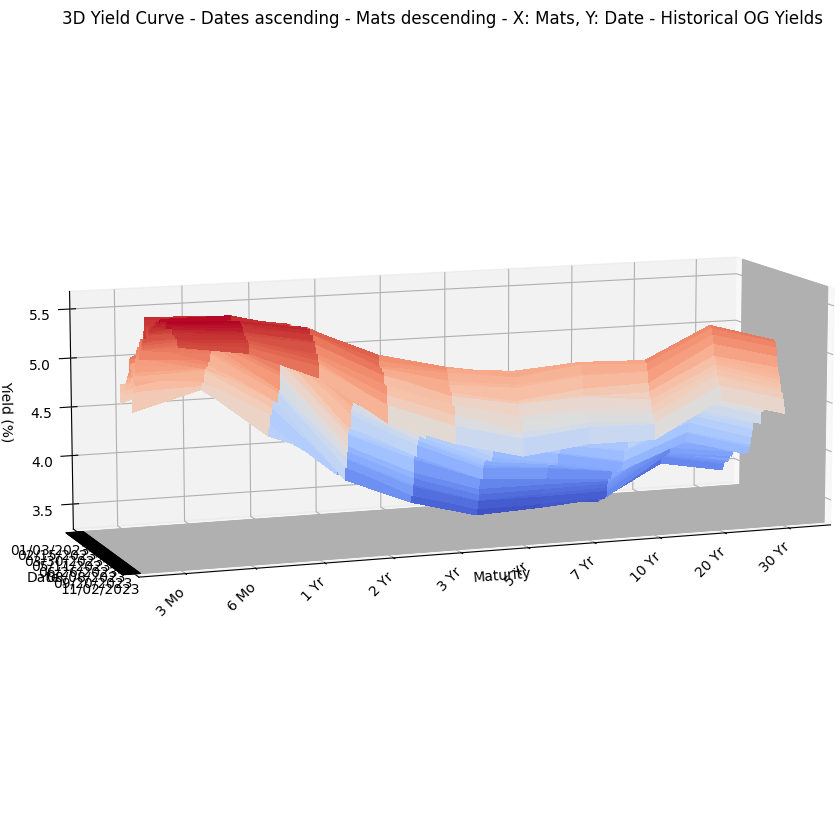

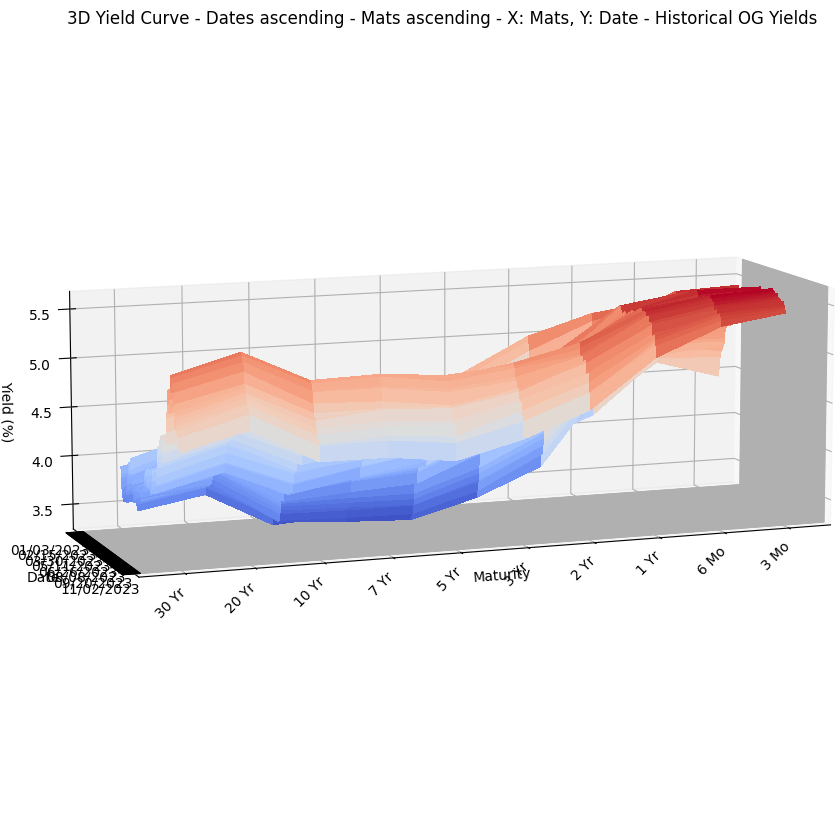

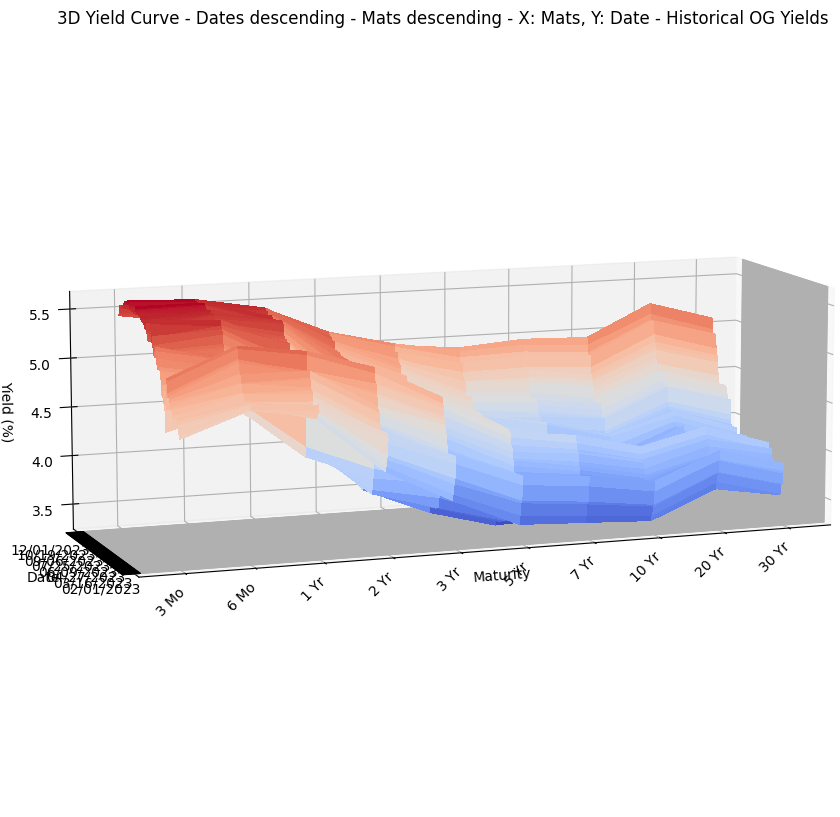

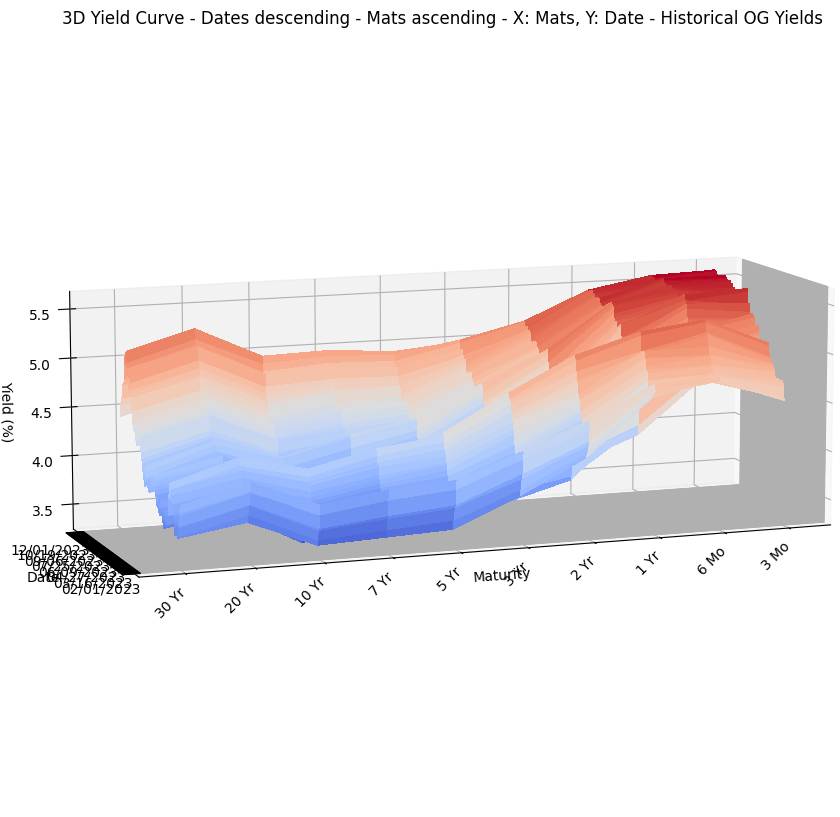

In [53]:
threeD_yield_curve(df.copy(), flip_dates=True, flip_maturity=False, og_yields=True, label_spacing=30, elev=10, azim=70, figsize=(10, 30), aspect=(3, 1, 1))
threeD_yield_curve(df.copy(), flip_dates=True, flip_maturity=True, og_yields=True, label_spacing=30, elev=10, azim=70, figsize=(10, 30), aspect=(3, 1, 1))
threeD_yield_curve(df.copy(), flip_dates=False, flip_maturity=False, og_yields=True, label_spacing=30, elev=10, azim=70, figsize=(10, 30), aspect=(3, 1, 1))
threeD_yield_curve(df.copy(), flip_dates=False, flip_maturity=True, og_yields=True, label_spacing=30, elev=10, azim=70, figsize=(10, 30), aspect=(3, 1, 1))

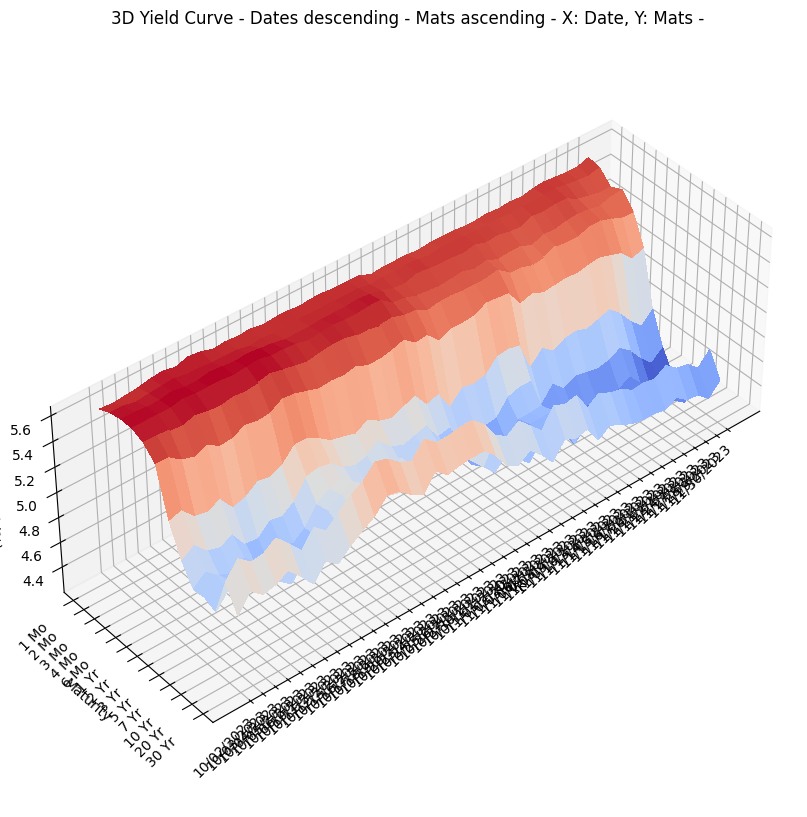

In [64]:
from_date = datetime(2023, 10, 1)
to_date = datetime(2023, 12, 1)
dates = [from_date, to_date]
threeD_yield_curve(df.copy(), flip_dates=False, flip_maturity=True, og_yields=False, flip_axis=True, date_subset_range=dates, label_spacing=1, elev=40, azim=50, aspect=(3, 1, 1), figsize=(10, 20))